# Laboratorio 2

## Angello Josué Almengor
## 22003729

In [1]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [51]:
img  = cv2.imread("crayones.jpg")
img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [15]:
img [0,0]

array([67, 42, 20], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

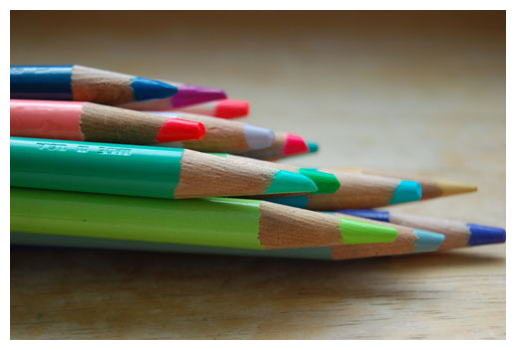

In [31]:
plt.imshow(img)
plt.axis('off')
plt.show

## Problema 1

Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

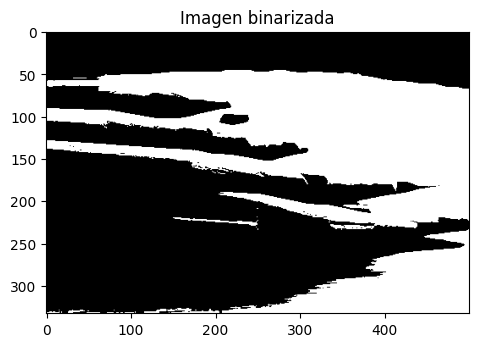

In [43]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def binarize_image(img, threshold=110):
     
    _, binary_img = cv.threshold(img, threshold, 255, cv.THRESH_BINARY) # umbral
    
    return binary_img

img = cv.imread('crayones.jpg', cv.IMREAD_GRAYSCALE) # imagen escala grises

binary_img = binarize_image(img, threshold=110) # Binarizar la imagen 

plt.figure(figsize=(12,5)) # imagen binarizada
plt.subplot(1, 2, 1)
plt.imshow(binary_img, cmap='gray')
plt.title('Imagen binarizada')
plt.show()


## Problema 2

Desarrolle una función con dos imagenes de igual ancho y alto y a color, (si no tienen el mismo tamaño debé de ajustarlo); realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

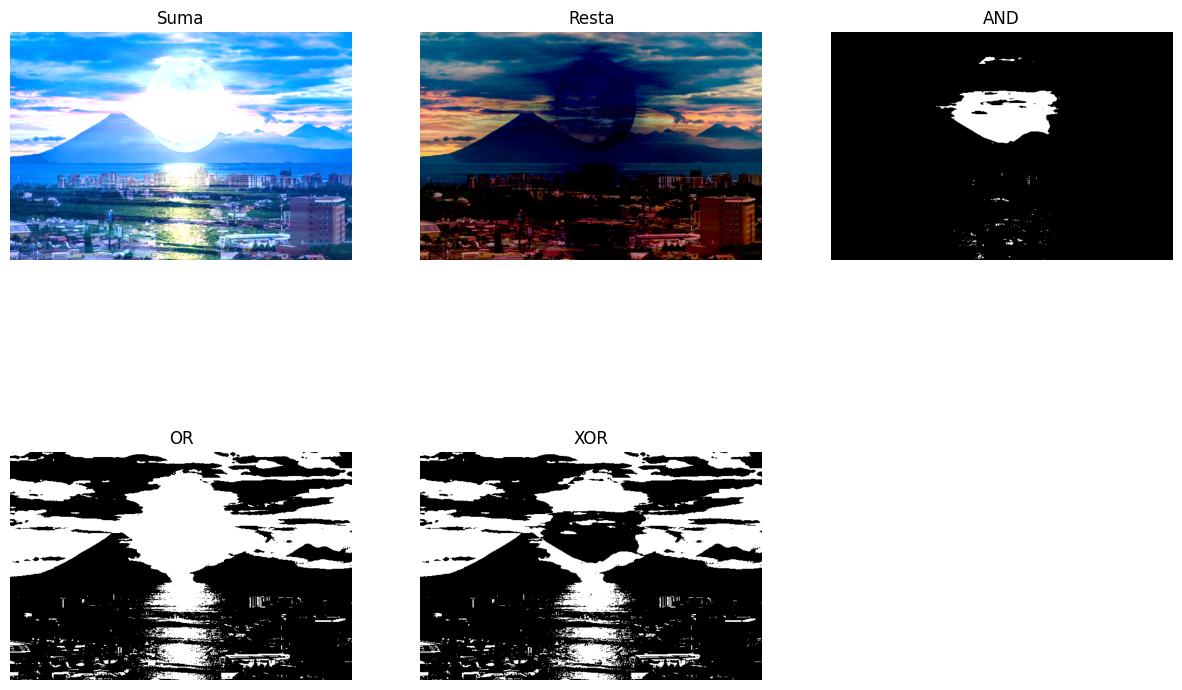

In [64]:
def process_images(img1, img2, threshold=127):

    # ajustar tamaño
    if img1.shape != img2.shape:
        img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))

    # imágenes grises
    gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

    # Binarizar las imágenes
    _, binary1 = cv.threshold(gray1, threshold, 255, cv.THRESH_BINARY)
    _, binary2 = cv.threshold(gray2, threshold, 255, cv.THRESH_BINARY)

    sum_img = cv.add(img1, img2)  # suma a color
    sub_img = cv.subtract(img1, img2)  # resta a color
    and_img = cv.bitwise_and(binary1, binary2)  # AND binarizada
    or_img = cv.bitwise_or(binary1, binary2)  # OR binarizada
    xor_img = cv.bitwise_xor(binary1, binary2)  # XOR binarizada

    # devuelve resultados
    results = {
        'Suma': sum_img,
        'Resta': sub_img,
        'AND': and_img,
        'OR': or_img,
        'XOR': xor_img
    }
    
    return results


img1 = cv.imread('guate.jpg') 
img2 = cv.imread('luna.jpg') 

results = process_images(img1, img2, threshold=127) # Procesar las imágenes


plt.figure(figsize=(15,10))
for i, (title, result) in enumerate(results.items()):
    plt.subplot(2, 3, i+1)
    if title in ['Suma', 'Resta']:  # imágenes a color
        plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
    else:  # imágenes en escala de grises
        plt.imshow(result, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()


## Problema 3

Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

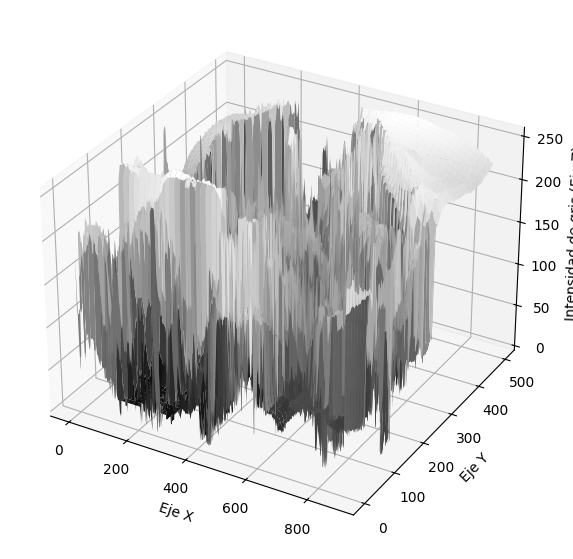

In [72]:
from mpl_toolkits.mplot3d import Axes3D

def imagen_3d (img3):

    # Crear coordenadas X & Y
    x = np.arange(0, img3.shape[1])
    y = np.arange(0, img3.shape[0])
    x, y = np.meshgrid(x, y)

    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    
    ax.plot_surface(x, y, img3, cmap='gray') 
 
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Intensidad de gris (Eje Z)')

    # Mostrar el gráfico
    plt.show()

img3 = cv.imread('auto.jpg', cv.IMREAD_GRAYSCALE) 

imagen_3d(img3) 


## Problema 4

Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

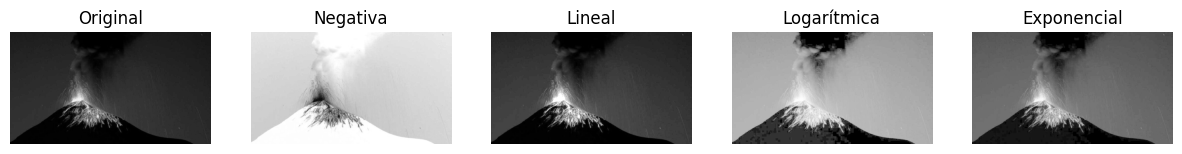

In [83]:
def negativa(img4):

    return 255 - img4

def lineal(img4, alpha=1, beta=0):

    return cv.convertScaleAbs(img4, alpha=alpha, beta=beta)

def logaritmica(img4, c=1):

    img_log = c * np.log1p(img4)
    
    img_log = 255 * (img_log - np.min(img_log)) / (np.max(img_log) - np.min(img_log))
    return img_log.astype(np.uint8)

def exponencial(img4, c=1, gamma=1):

    img_exp = c * np.power(img4, gamma)
    

    img_exp = 255 * (img_exp - np.min(img_exp)) / (np.max(img_exp) - np.min(img_exp))
    return img_exp.astype(np.uint8)

img4 = cv.imread('vfuego.jpg', cv.IMREAD_GRAYSCALE)

negative_img = negativa(img4)
linear_img = lineal(img4, alpha=1.2, beta=30)
logarithmic_img = logaritmica(img4, c=30)
exponential_img = exponencial(img4, c=1, gamma=0.5)

titles = ['Original', 'Negativa', 'Lineal', 'Logarítmica', 'Exponencial']
images = [img4, negative_img, linear_img, logarithmic_img, exponential_img]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## Problema 5

Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

El kernel Laplaciano se basa en la idea de la segunda derivada de la intensidad de la imagen. En términos matemáticos, el Laplaciano de una función de intensidad de imagen se define como:

![alt text](image.png)

Donde I(x,y) es la intensidad de la imagen en el punto (x,y). El kernel Laplaciano se usa para encontrar regiones de la imagen donde hay cambios rápidos en la intensidad, que corresponden a los bordes. La idea es que los bordes se manifiestan como máximos locales en la magnitud del Laplaciano.


Algoritmo de Canny
El algoritmo de Canny es un método más complejo y sofisticado para la detección de bordes. Se compone de varios pasos:

Filtrado Gaussiano: La imagen se suaviza utilizando un filtro Gaussiano para reducir el ruido. Este paso ayuda a evitar la detección de bordes falsos que pueden ser causados por el ruido en la imagen.

Cálculo del Gradiente: Se calcula el gradiente de la imagen utilizando operadores de derivada (como Sobel). Esto ayuda a detectar los bordes, que se manifiestan como cambios abruptos en la intensidad de la imagen.

Diferencias
Complejidad: El kernel Laplaciano es relativamente simple y rápido, pero puede ser sensible al ruido y no siempre produce resultados precisos. El algoritmo de Canny es más complejo y tarda más tiempo en ejecutarse, pero ofrece resultados más precisos y robustos.

Suavizado: El kernel Laplaciano no realiza suavizado previo, lo que puede llevar a una mayor sensibilidad al ruido. En contraste, el algoritmo de Canny incluye un paso de suavizado Gaussiano para reducir el ruido.